# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This case study investigated a dataset containing about 5000 movies collected from The Movie Database (TMDb). This dataset was doownloaded from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv). Note that the original data from IMDB has been taken down and replaced with a similar data from TMDB.

In this report I wish to identify the relationship between multiple variables in the dataset. Here are the question I plan on exploring:

> **Question 1:** Do movie genres with high budget generate high revenue?

> **Question 2:** Between high budget,  popularity, and high vote_count which is most likely to generate high revenue?

Let's import the neccessary packages

In [2]:
# import packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### data exploration
The first step before doing anything with data is to locate the file (for this report a .csv file) in the directory I am working on and then read it through the built-in Pandas functions. In my case, I have `tmdb_5000_movies.csv` file stored in the same directory I’m working on.

In [33]:
# read the movies data into a dataframe
df = pd.read_csv("tmdb_5000_movies.csv")
# check the data by previewing the first few rows
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Top 5 rows

In [34]:
# return the rows and columns of the dataframe
df.shape

(4803, 20)

4803 rows and 20 columns

In [35]:
# return the data types of each column
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

From the above code excerpt, I have explored the data, shapes, and also it types. I have an overview of the kind of data I am dealing with. Now let’s describe the data through `describe()` function.

In [36]:
# return a basic statiscal description
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


The `describe()` gives the insights about the data and some useful statistics about the data such as mean, min and max etc.

### dealing with missing values
The dataset may consist of a lot of missing and duplicate values, so it's my responsibility to deal with them before doing any analysis.

In [37]:
# return the sum of missing values as follows
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Sum of missing values

In [38]:
# return sum of duplicated values in the dataframe
df.duplicated().sum()

0

No duplicates.

5 columns contain missing values. But, before handling missing and duplicates values, I prefer to first select the data I am interested in.

### selecting preferred data

> Based on my research question, I am not interested in all the columns in the dataset. In the below code except, I will only select the data I am interested in.

> To do that, let's first enumerate the dataframe to display the indexes of the columns.

In [40]:
# enumerate the dataframe to list out the indexes
for i,v in enumerate(df):
    print(i, v)

0 budget
1 genres
2 homepage
3 id
4 keywords
5 original_language
6 original_title
7 overview
8 popularity
9 production_companies
10 production_countries
11 release_date
12 revenue
13 runtime
14 spoken_languages
15 status
16 tagline
17 title
18 vote_average
19 vote_count


In [52]:
# select the desired columns
desired_df = df.iloc[:, np.r_[0:2, 8, 12, 18, 19 ]]

# check the result
desired_df.head()

,budget,genres,popularity,revenue,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100,6.1,2124


Top 5 rows of interested columns

In [53]:
# save the new dataset
desired_df.to_csv("tmdb_movies_desired.csv", index=False)

In [54]:
# update desired_df by reading the tmdb_movies_desired.csv
desired_df = pd.read_csv("tmdb_movies_desired.csv")
desired_df.head()

,budget,genres,popularity,revenue,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100,6.1,2124


In [96]:
# return the number of (rows, columns) of the desired_df
desired_df.shape

(4803, 6)

we now have 4803 rows and 6 columns. It is important we still check for missing values and duplicates.

In [98]:
# return the sum of missing values of desired_df
desired_df.isna().sum()

budget          0
genres          0
popularity      0
revenue         0
vote_average    0
vote_count      0
dtype: int64

In [58]:
# return the sum of duplicated values of desired_df
desired_df.duplicated().sum()

0

just to be sure of any duplicate or missing values.

<a id='eda'></a>
## Exploratory Data Analysis

Before moving to the research questions, here is a statical description of the desired dataset I am going to work with.

In [91]:
# return a basic statiscal description of desired_df
desired_df.describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


also, I will like to show the histogram of the datasets. Reason is to have an idea of the distribution of each columns.

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

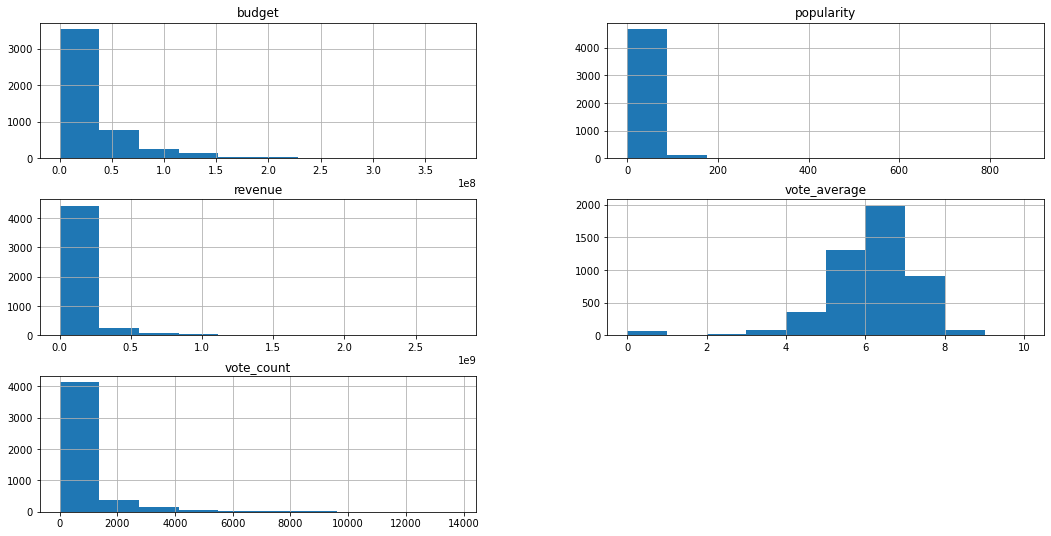

In [94]:
desired_df.hist(figsize=(18, 9))

### Question 1: Do movie genres with high budget generate high revenue?

First, I am going to graphically analyse the **budget** variable using Histogram.

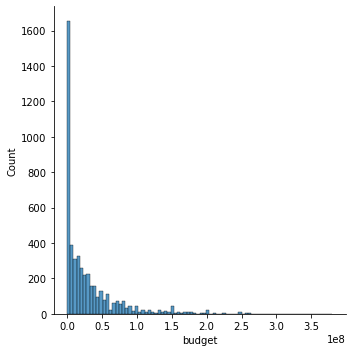

In [61]:
# output histogram of budget column
sns.displot(desired_df["budget"]);

From the above graph, the **budget** deviate from the normal and is positively skewed. Now I will use the median to measure it center.

In [62]:
# output budget median
desired_df.budget.median()

15000000.0

next is to put divide the data into two groups: *low_budget_genres* and *high_budget_genres*.

In [64]:
# grouping the data
low_budget_genres = desired_df.query("budget < 15000000.0")
high_budget_genres = desired_df.query("budget >= 15000000.0")

now, just to be sure there wasn't a double query and rows matches the parent dataset, I will compare them below:

In [100]:
desired_df.shape[0] == low_budget_genres["budget"].count() + high_budget_genres["budget"].count()

True

cool! now let's print out the average revenue for the `low_budget_genres` and the mean revenue for the `high_budget_genres`.

In [67]:
# mean revenue for the low_budget_genres
print(low_budget_genres.revenue.mean())

16589591.213333333


In [68]:
# mean revenue for the hight_budget_genres
print(high_budget_genres.revenue.mean())

147849699.7636288


> **movie genres with high budget seems generate high revenue.**

A good time to also look at the correlation between the movie genres *budget* and the *revenue*.

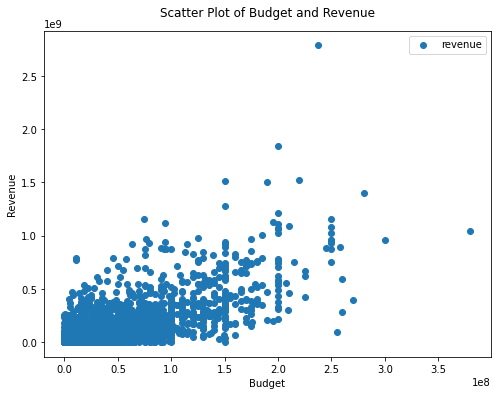

In [102]:
# a function to display a scatterplot
# between two variables.
def plot_variables(dataset, x, y):
    # takes a dataset
    # plot a scatter plot of x and y column
    # display the scatterplot
    
    plt.figure(figsize = [8, 6])
    plt.scatter(data = dataset, x = x, y = y)
    
    title = "Scatter Plot of " + x.capitalize() + " and " + y.capitalize()
    
    plt.title(title, fontsize=12, y=1.025)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.legend()
    plt.show()

# display a scatterplot of Budget and Revenue
plot_variables(desired_df, "budget", "revenue")

### Question 2: Between high budget,  popularity, and high vote_count which is most likely to generate high revenue?

> Since we have done analysis on Budget and Revenue on the previous question, I decide not to repeat the same analysis. I will just perform analysis on Popularity and Vote Count to Revenue.

#### Popularity

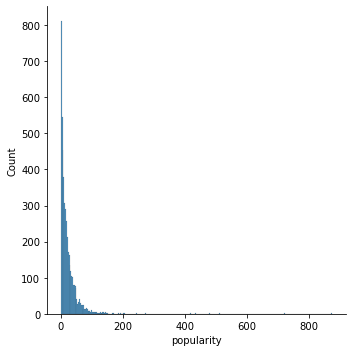

In [73]:
# histogram of popularity
sns.displot(desired_df["popularity"]);

From the above graph, the **popularity** deviate from the normal and is positively skewed. Now I will use the median to measure it center.

In [74]:
# budget median
desired_df.popularity.median()

12.921594

next is to put divide the data into two groups: *unpopular_genres* and *popular_genres*.

In [75]:
# grouping the data by popularity
unpopular_genres = desired_df.query("popularity < 12.921594")
popular_genres = desired_df.query("popularity >= 12.921594")

now, just to be sure the sum of both group shape matches the parent dataset, I will compare them below:

In [76]:
desired_df.shape[0] == unpopular_genres["popularity"].count() + popular_genres["popularity"].count()

True

cool! now let's print out the mean revenue for the `unpopular_genres` and the mean revenue for the `popular_genres`.

In [78]:
# mean revenue for the unpopular_genres
print(unpopular_genres.revenue.mean())

12244798.24489796


In [79]:
# mean revenue for the popular_genres
print(popular_genres.revenue.mean())

152247330.08243132


> **Considering both means, movie genres that are popular seems to generate high revenue.**

Let's look at the correlation between the movie genres *popularity* and the *revenue*.

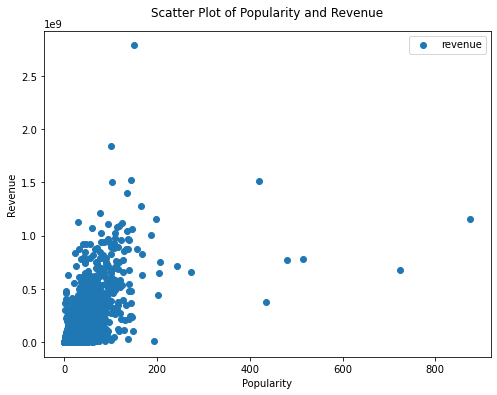

In [103]:
# display a scatterplot of Popularity and Revenue
plot_variables(desired_df, "popularity", "revenue")

#### Vote Count

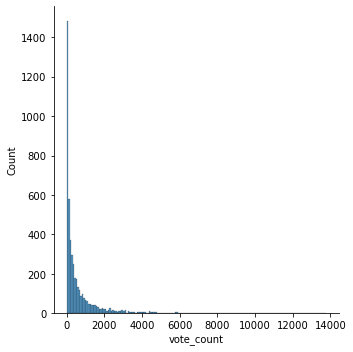

In [83]:
# histogram for vote count
sns.displot(desired_df["vote_count"]);

Also, the **vote_count** deviate from the normal and is positively skewed. Now I will use the median to measure it center.

In [84]:
# budget median
desired_df.vote_count.median()

235.0

next is to put divide the data into two groups: *low_vote_count_genres* and *high_vote_count_genres*.

In [85]:
# grouping the data
low_vote_count_genres = desired_df.query("vote_count < 235.0")
high_vote_count_genres = desired_df.query("vote_count >= 235.0")

now, just to be sure the sum of both group shape matches the parent dataset, I will compare them below:

In [86]:
desired_df.shape[0] == low_vote_count_genres["vote_count"].count() + high_vote_count_genres["vote_count"].count()

True

cool! now let's print out the mean revenue for the `low_vote_count_genres` and the mean revenue for the `high_vote_count_genres`.

In [87]:
# mean revenue for the low_vote_count_genres
print(low_vote_count_genres.revenue.mean())

9897171.580550918


In [88]:
# mean revenue for the high_vote_count_genres
print(high_vote_count_genres.revenue.mean())

154293404.37764853


> **Considering the mean, I can say high vote_count generate high revenue.**

Let's look at the relationship between the movie genres *vote_count* and *revenue*.

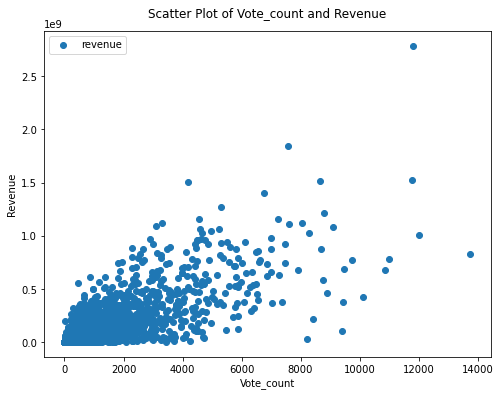

In [104]:
# display a scatterplot of Vote_count and Revenue
plot_variables(desired_df, "vote_count", "revenue")

> **From our exploration, high budget, popularity, and high vote_count positively impact on revenue. The higher they are the higher the revenue.**

Now, using bar graph, let's see which of them most likely generate high revenue the most using a bar graph.

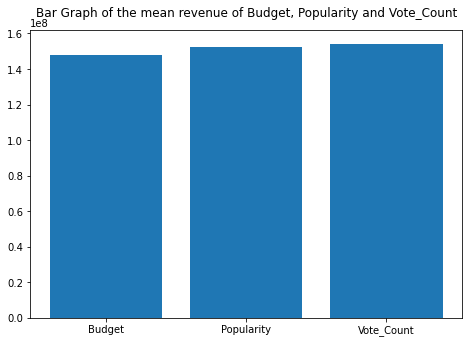

In [107]:
# bar graph of means
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
cols = ["Budget", "Popularity", "Vote_Count"]
# array of means( high_budget_genres, popular_genres, and high_vote_count_genres)
cols_mean = [high_budget_genres.revenue.mean(), popular_genres.revenue.mean(), high_vote_count_genres.revenue.mean()]
ax.bar(cols, cols_mean)
title = "Bar Graph of the mean revenue of " + cols[0] + ", " + cols[1] + " and " + cols[2]
plt.title(title, fontsize=12, y=1.025)
plt.show()

> **The bar graph shows that all three (Budget, Popularity, and Vote Count) variables have almost same impact on revenue.**

<a id='conclusions'></a>
## Conclusions
From our examination, it was identified that budget, popularity, and vote_count affects revenue. Revenue is postively correlated with budget, popularity, and vote_count. The high the budget the higher the revenue. The higher the popularity the higer the revenue. Also, the higher the vote_count the higher the revenue.

Though it is hard to conclude between Budget, Popularity, and Vote Count which is most likely to affect revenue.

## Limitations
In this analysis, there were some limitations.

First, the original dataset has been replace with a similar data from The Movie Database. While this data might be similar, it is stated clearly that the quality of the dataset has not be confirmed or certified.

Secondly, I feel the sample size of about 5000 is not large enough compare to the numbers of movies from the original data source (IMDB). And our conclusion may not be strong enough.

Lastly, few columns were extracted from the data for the sole purpose of answering the research questions. The result obtained may not be applicable to other columns in the dataset.